<a href="https://colab.research.google.com/github/sw-shar/mathematics_for_analysis/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1_%D0%A1%D0%9B%D0%90%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1

Посчитайте число обусловленности для матрицы системы линейных уравнений:

In [279]:
from scipy.linalg import svd
import numpy as np

In [280]:
A = np.array([[4,4,5,5.0],[2,0,3,-1],[1,1,-5,0],[0,3,2,0]]) # Матрица (левая часть системы)
V = np.array([0,10,-10,1]) # вектор ответов

best = np.linalg.solve(A, V) #решим систему
best

array([ 1., -1.,  2., -2.])

Решение для оригинальной матрицы:
* x1=1, x2=-1, x3=2, x4=-2

In [281]:
# Изменим величину столбца (0, 10, -10, 1) на 0.1 в большую сторону

v_right = V+0.1

x_right = np.linalg.solve(A, v_right) #решим систему
x_right

array([ 1.03931034, -0.96344828,  1.99517241, -2.03586207])

In [282]:
# Изменим величину столбца (0, 10, -10, 1) на 0.1 в меньшую сторону

v_left = V-0.1

x_left = np.linalg.solve(A, v_left) #решим систему
x_left

array([ 0.96068966, -1.03655172,  2.00482759, -1.96413793])

In [283]:
# абсолютная погрешность x_right
abs_right = sum(abs(best - x_right))

# абсолютная погрешность x_left
abs_left= sum(abs(best -  x_left))


print("относительная погрешность справа", round(abs_right / sum(abs(best))*100,4,),'%')
print("относительная погрешность слева", round(abs_left / sum(abs(best))*100,4),'%')

относительная погрешность справа 1.9425 %
относительная погрешность слева 1.9425 %


Получилось что при изменении на 2 процента вектора ответов приблизительно на это мы и получили относительную погрешность. Изменение вправо или влево не дало статистически значимой разницы.

In [284]:
# увеличим значения в одном столбце матрицы на 0.1
A[:,1] = A[:,1]+0.1
A

array([[ 4. ,  4.1,  5. ,  5. ],
       [ 2. ,  0.1,  3. , -1. ],
       [ 1. ,  1.1, -5. ,  0. ],
       [ 0. ,  3.1,  2. ,  0. ]])

In [285]:
A_inv_bad_V = np.linalg.inv(A) @ V
A_inv_bad_V

array([ 1.03792415, -0.96473719,  1.99534265, -2.03459747])

In [286]:
# абсолютная погрешность 
abs_V = sum(abs(best - A_inv_bad_V))

print("относительная погрешность при изменении значений обратной матрицы на 0.1", round(abs_V / sum(abs(best))*100,4,),'%')

относительная погрешность при изменении значений обратной матрицы на 0.1 1.874 %


система является «хорошо обусловленной», так как малые изменения, внесенные в коэффициентах матрицы или в правую часть, повлекли за собой малые изменения в решении системы.

## Задача 2

Проделайте аналогичные действия из задачи 1 для следующей системы.

In [287]:
A2 = np.array([[2.0,-1,3,2],[3,3,3,2],[3,-1,-1,-2],[3,-1,3,-1]]) # Матрица (левая часть системы)
V2 = np.array([4,6,6,6]) # вектор ответов

best2 = np.linalg.solve(A2, V2) #решим систему
best2

array([ 2.00000000e+00, -6.24500451e-17, -2.08166817e-17,  8.32667268e-17])

In [288]:
np.linalg.matrix_rank(A2)

4

In [289]:
np.linalg.det(A2)

127.99999999999997

In [290]:
np.linalg.norm((A2), ord=2)

7.276128889583064

In [291]:
v_right2 = V2+0.1

x_right2 = np.linalg.solve(A2, v_right2) #решим систему
x_right2

v_left2 = V2-0.1

x_left2 = np.linalg.solve(A2, v_left2) #решим систему
x_left2

array([ 1.9625  ,  0.009375,  0.003125, -0.0125  ])

In [292]:
# абсолютная погрешность x_right
abs_right2 = sum(abs(best2 - x_right2))

# абсолютная погрешность x_left
abs_left2= sum(abs(best2 -  x_left2))


print("относительная погрешность справа", round(abs_right2 / sum(abs(best2))*100,4,),'%')
print("относительная погрешность слева", round(abs_left2 / sum(abs(best2))*100,4),'%')

относительная погрешность справа 3.125 %
относительная погрешность слева 3.125 %


In [293]:
# увеличим значения в первом столбце матрицы на 0.1
A2[:,0] = A2[:,0]+0.1
A2

A_inv_bad_V2 = np.linalg.inv(A2) @ V2
A_inv_bad_V2

# абсолютная погрешность 
abs_V2 = sum(abs(best2 - A_inv_bad_V2))

print("относительная погрешность при изменении значений обратной матрицы на 0.1", round(abs_V2 / sum(abs(best2))*100,4,),'%')

относительная погрешность при изменении значений обратной матрицы на 0.1 6.0241 %


Поскольку только х1 имеет значение в решении, изменим первый слолбец на 0.1 и получаем что если остальные х принимают значение 0 , тогда размер влияние езменение данных одного столбца - существенно выше - чем при именении вектора ответов. 3.125 вектор и 6 % матрица


## Задача 3

Замените в следующей системе линейных уравнений значения коэффициентов на 0.01 в большую сторону и на 0.01 в меньшую сторону

In [294]:
A3 = np.array([[1,2,-4],[2,1,-5],[1,-1,-1]]) # Матрица (левая часть системы)
V3 = np.array([1,-1,-2]) # вектор ответов

In [295]:
np.linalg.matrix_rank(A3)

2

In [296]:
np.linalg.det(A3)

0.0

In [297]:
np.linalg.norm((A3), ord=2)

7.128236934865544

Определитель матрицы равен нулю и ранг матрицы системы меньше числа неизвестных  - система имеет бесконечно много решений

In [298]:
A3_big = A3 +0.01
A3_small = A3 -0.01

In [299]:
np.linalg.matrix_rank(A3_big)
np.linalg.det(A3_big)

-0.12000000000000123

In [300]:
# найдем норму обратных матриц
norma_A3_big = abs(np.linalg.inv(A3_big)).max()

norma_A3_small = abs(np.linalg.inv(A3_small)).max()

norma_A3_big

49.999999999999474

In [301]:
# или найдем норму с помощью numpy
np.linalg.norm(np.linalg.inv(A3_big), ord=2)

105.83254129242056

Посмотрим на число обусловленности каждой из матриц

In [302]:
print('Оригинал', np.linalg.cond(A3) )

print('A3_big', np.linalg.cond(A3_big) )

print('A3_big', np.linalg.cond(A3_small) )

Оригинал 2.6334520172237944e+16
A3_big 753.8831931033308
A3_big 758.2886236166106


In [303]:
np.linalg.solve(A3_big, V3)

array([-1.00000000e+00,  1.00000000e+00,  9.97709378e-15])

In [304]:
np.linalg.solve(A3_small, V3)

array([-1.00000000e+00,  1.00000000e+00, -2.13703985e-15])

Если взять число обусловленности изначальной матрицы - то оно уходит в бесконечность, а  исправленной матрицы мы видим что она выходит за пределы 100 но уже не бесконечно

In [305]:
print('Оригинал из задачи 1', np.linalg.cond(A) )

Оригинал из задачи 1 4.35692080130134


Матрицы, которые вырожденные, даже с изменениями коэффицентов дают большое число обусловденности в отличии от хороших матриц.

## Задача 4

реализация метода Якоби

In [306]:
A4 = np.array([[8,1,-4],[2,-6,1],[-1,1,4]])
V4=np.array([6,-9,5])

решим СЛАУ классическим методом

In [307]:
X4=np.linalg.solve(A4, V4)
X4

array([1., 2., 1.])

In [308]:
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

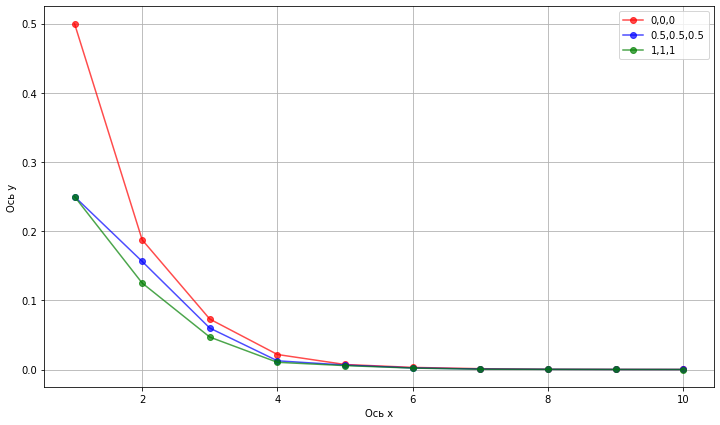

In [309]:
def jacobi(A,b,N,X4,x=None):
                                                                                                                                                                   
    D = diag(A)
    R = A - diagflat(D)

    s = []                                                                                                                                                                         
    for i in range(N):
        x = (b - dot(R,x)) / D
        s.append(x)
    
    solutions = []
    for i in range(N):
      solutions.append(abs(s[i]-X4).max())
    return solutions
N=10
sol_0 = jacobi(A4,V4,N,X4,x=array([0,0,0]))
sol_1 = jacobi(A4,V4,N,X4,x=array([0.5,0.5,0.5]))
sol_11 = jacobi(A4,V4,N,X4,x=array([1,1,1]))

import matplotlib.pyplot as plt
x = [i for i in range(1,N+1)]
plt.figure(figsize=(12, 7))
plt.plot(x, sol_0,'o-r', alpha=0.7, label="0,0,0",)
plt.plot(x, sol_1,'o-b', alpha=0.7, label="0.5,0.5,0.5",)
plt.plot(x, sol_11,'o-g', alpha=0.7, label="1,1,1",)
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.legend()
plt.grid(True)
plt.show()

Метод сходиться, при этом различные начальные точки - дают разную скорость сходимости.

## Задача 5

 метода Гаусса-Зейделя

In [310]:
def gauss(A,b,x):
  size = len(A)
  for a in range(size):
    d = b[a]
    for i in range(size):     
              if(a != i):
                  d-=A[a][i] * x[i]
        
    x[a] = d / A[a][a]
  return x

def gays(A,b,N,X4,x):
  solutions=[]
  for i in range(N):            
      gauss(A,b,x)
     # print(abs(x-X4).max())
      solutions.append(abs(x-X4).max())
  return solutions


In [311]:
gs00 = gays(A4,V4,N,X4,x = [0,0,0])
gs05 = gays(A4,V4,N,X4,x = [0.5,0.5,0.5])
gs01 = gays(A4,V4,N,X4,x = [1,1,1])

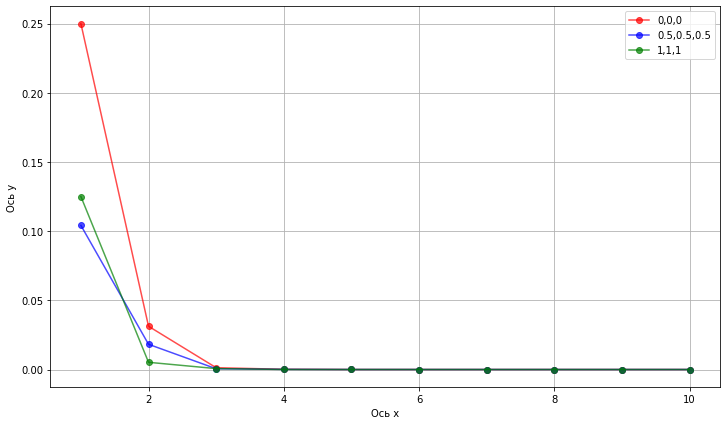

In [312]:
w = [i for i in range(1,N+1)]
plt.figure(figsize=(12, 7))
plt.plot(w, gs00,'o-r', alpha=0.7, label="0,0,0",)
plt.plot(w, gs05,'o-b', alpha=0.7, label="0.5,0.5,0.5",)
plt.plot(w, gs01,'o-g', alpha=0.7, label="1,1,1",)
plt.xlabel('Ось x')
plt.ylabel('Ось y')
plt.legend()
plt.grid(True)
plt.show()

По методу Гаусса-Зейделя уравнение сходиться быстрее.

## Задача 6

сравнение сходимостей методов Якоби и Гаусса-Зейделя


In [313]:
size_matrix = 500
A5 = np.eye(size_matrix,size_matrix)+1
A5[np.arange(size_matrix), np.arange(size_matrix)] = 1000
#A5[np.arange(0,size_matrix), np.arange(size_matrix-1,-1,-1)] = 1000 # может быть и побочную диагональ надо было?
A5

array([[1000.,    1.,    1., ...,    1.,    1.,    1.],
       [   1., 1000.,    1., ...,    1.,    1.,    1.],
       [   1.,    1., 1000., ...,    1.,    1.,    1.],
       ...,
       [   1.,    1.,    1., ..., 1000.,    1.,    1.],
       [   1.,    1.,    1., ...,    1., 1000.,    1.],
       [   1.,    1.,    1., ...,    1.,    1., 1000.]])

In [314]:
answer1 = np.ones_like(np.arange(size_matrix)) # вектор из едениц
answer2 = np.random.randn(size_matrix) # рандомный вектор


In [315]:
# Решим систему встроенным решателем.
from scipy.sparse.linalg import spsolve

Xa1 = spsolve(A5, answer1)# вектор из едениц
Xa2 = spsolve(A5, answer2) # рандомный вектор

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [316]:
x = np.zeros(size_matrix)
N=10
t_jacobi1= jacobi(A5, answer1,N,Xa1,x)# вектор из едениц
t_jacobi2= jacobi(A5, answer2,N,Xa2,x) # рандомный вектор

In [317]:
x = np.zeros(size_matrix)
t_gays1 = gays(A5, answer1,N,Xa1,x) 
t_gays2 = gays(A5, answer2,N,Xa2,x)# рандомный вектор


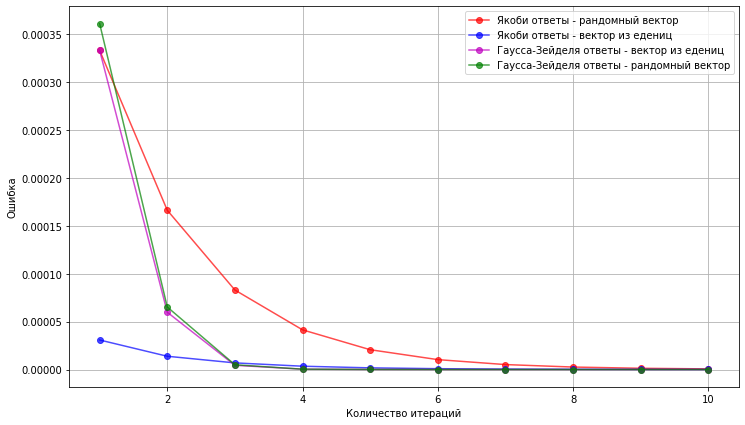

In [319]:
w = [i for i in range(1,N+1)]
plt.figure(figsize=(12, 7))
plt.plot(w, t_jacobi1,'o-r', alpha=0.7, label="Якоби ответы - рандомный вектор",)
plt.plot(w, t_jacobi2,'o-b', alpha=0.7, label="Якоби ответы - вектор из едениц",)
plt.plot(w, t_gays1,'o-m', alpha=0.7, label="Гаусса-Зейделя ответы - вектор из едениц",)
plt.plot(w, t_gays2,'o-g', alpha=0.7, label="Гаусса-Зейделя ответы - рандомный вектор",)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()

Даже для больших матриц метод Гаусса-Зейделя
сходиться лучше. При этом он равномерно сходиться при любых значениях, а метод Якоби быстро определяет вектор из едениц но гораздо дольше рандомный вектор.